In [1]:
# Importing necessary modules from the segment_anything package for SAM model
from segment_anything import sam_model_registry, SamPredictor

# Importing essential libraries for deep learning and visualization
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

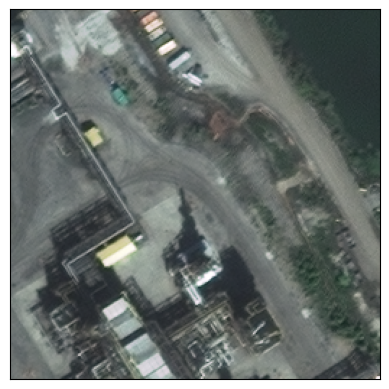

In [5]:
# Assuming you have the necessary imports
image_path = 'E:/BEEILAB/Codding/SAM/Data/3.tif'
image = plt.imread(image_path)  # Read the image using Matplotlib

plt.imshow(image)  # Display the image using Matplotlib
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()  # Show the image plot

In [6]:
# Load pre-trained model checkpoint for Vision Transformer model from a web address
sam_checkpoint = "sam_vit_h_4b8939.pth" # In case you are not utilizing Google Colab, it is recommended that you obtain the SAM checkpoints from this web address: 
                                        #https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
# Specify the type of Vision Transformer model to use
model_type = "vit_h"
# Specify the device to use for computation (CPU or GPU)
device = "cpu" # If you have gpu on your computer and is campatibale with torch you cand change "cpu" to "cuda".
                # In order to check torch is compatible with torch in your system you can use torch.cuda.is_available().
                # If it returns True, you can use cuda.

# Initialize segmentation model using a factory function with the loaded checkpoint as an argument
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# Move the segmentation model to the specified device
sam.to(device=device)
# Create predictor object for the segmentation model
predictor = SamPredictor(sam)

In [7]:
# Set the image for prediction using the SAM predictor object
predictor.set_image(image)

In [8]:
# IPython magic command to configure how plots are displayed
%matplotlib
%matplotlib

Using matplotlib backend: <object object at 0x0000027803183A30>
Using matplotlib backend: TkAgg


In [17]:
# Initialize empty lists to store clicked points and their labels
points = []
labels = []
def onclick(event): # Define a function to handle mouse clicks on the image
    if event.key == 'A': # Check if the key pressed is 'A'
        # Access global variables for points and labels
        global points
        global labels
    
        x = int(round(event.xdata)) # Extract x coordinate of the click
        y = int(round(event.ydata)) # Extract y coordinate of the click
        
        ax.plot(x, y, 'o', markersize=4, color='red') # Plot a red circle at the clicked point on the image
        plt.show() # Display the updated plot        
        # Store the coordinates in the points list along with a label (in this case, the label is set to 1)
        points.append([x, y])
        labels.append(1)

In [18]:
# Create a subplot
ax = plt.subplot(111)
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
# Connect the mouse click event to the 'onclick()' function
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)
# Show the plot
plt.show()

In [19]:
# Convert the lists of clicked points and labels into NumPy arrays
points = np.array(points)
labels = np.array(labels)

# Use the predictor object to predict masks, scores, and logits
# The 'multimask_output=True' argument indicates that the model should generate multiple masks
masks, scores, logits = predictor.predict(
    point_coords=points,
    point_labels=labels,
    multimask_output=True,
)

In [20]:
def show_mask(mask, ax, random_color=True):
    # Check if random color is requested
    if random_color:
        # Generate a random color with alpha value for the mask
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        # Use a default shade of blue with alpha value for the mask
        color = np.array([30/255, 144/255, 255/255, 0.6])
    # Get the height and width of the mask
    h, w = mask.shape[-2:]
    # Reshape the mask into an RGB image by multiplying it element-wise with the color array
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    # Display the colored mask on the provided matplotlib axis
    ax.imshow(mask_image)

In [21]:
# Iterate over pairs of masks and scores using enumerate and zip
for i, (mask, score) in enumerate(zip(masks, scores)):
    
    plt.figure(figsize=(10, 10)) # Create a new matplotlib figure
    
    plt.imshow(image) # Display the original image
    
    # Use the show_mask function to display the current mask on the same figure
    show_mask(mask, plt.gca())
    
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18) # Set the title including the mask index and its score
    
    plt.axis('off') # Turn off the axis for a cleaner appearance

    # Show the figure
    plt.show()